# Problem Statment

**Introduction**

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

**Business Understanding **

You work for a consumer finance company which specializes in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:


If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company



The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


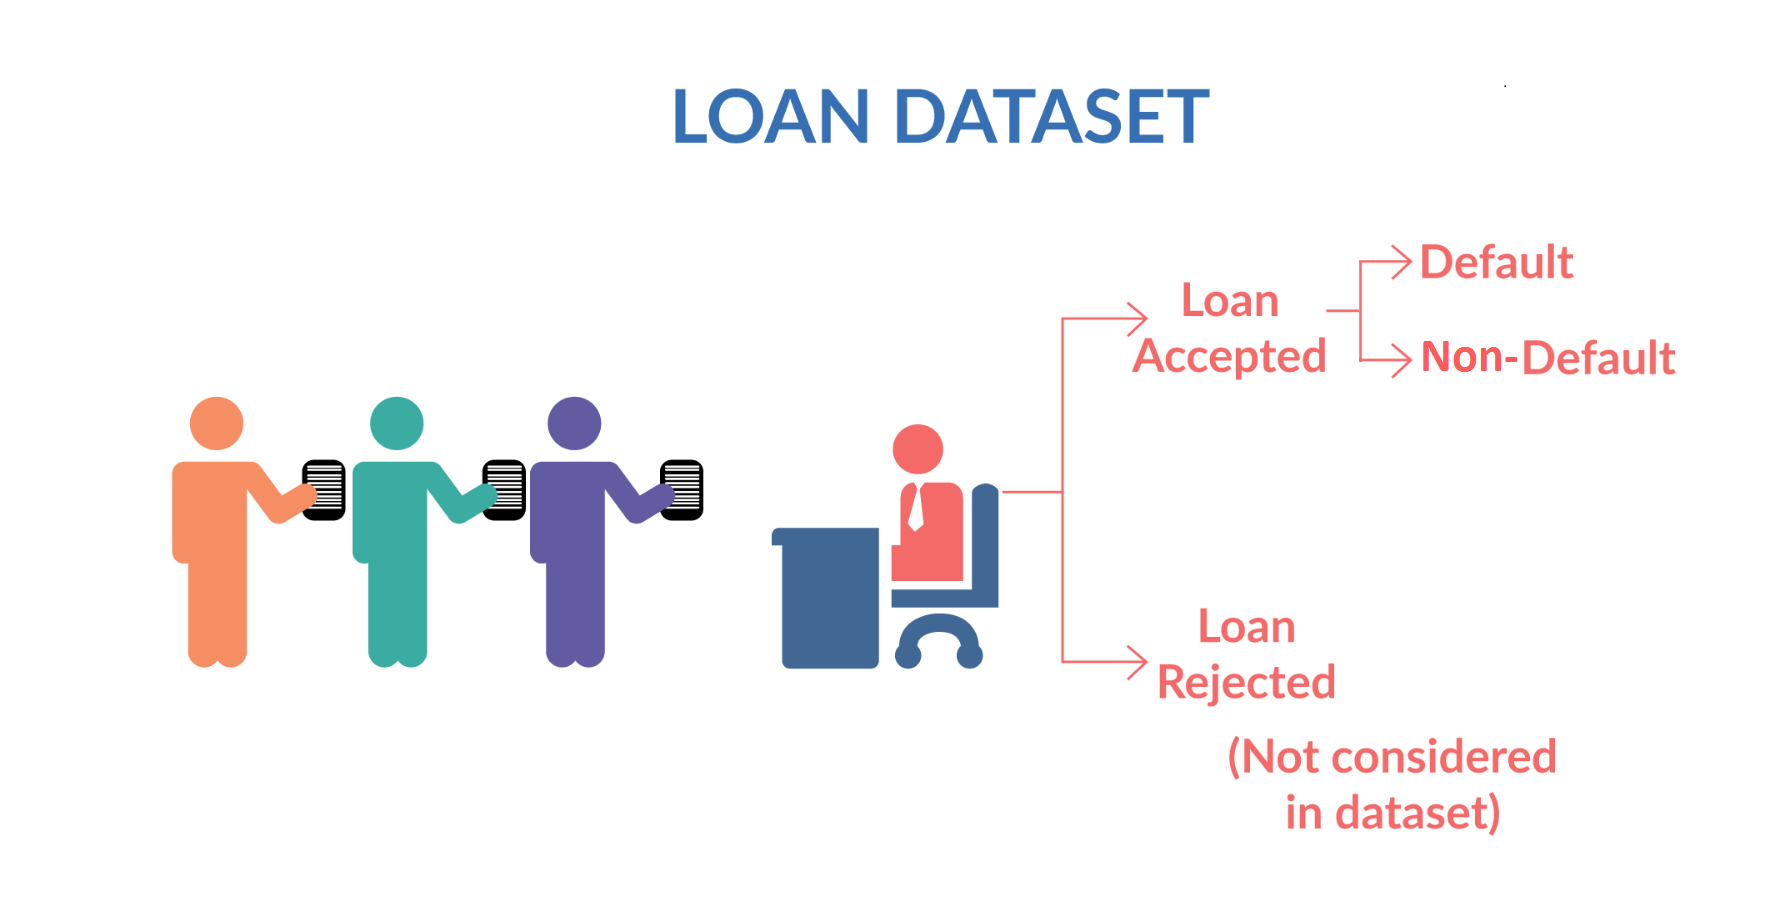


When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:
	- Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
	- Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
	- Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

**Business Objectives**

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who **default** cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

# Step-by-Step Approach to EDA for Identifying Loan Default Indicators

**Step 1: Data Understanding**

- **Load Data & Overview**: Load the dataset to understand its structure and contents and get an overview of the dataset including the number of records, types of variables, missing values, etc.


In [76]:
import pandas as pd

df = pd.read_csv('/content/sample_data/loan.csv')

print(df.head())

print(df.info())

print(df.describe())

<ipython-input-76-bb3058e06246>:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/loan.csv')


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [77]:
# Iterate through all columns and identify null values
for column in df.columns:
    null_count = df[column].isna().sum()
    if null_count > 0:
        print(f"Column '{column}' has {null_count} missing values.")

# Optionally, create a summary of missing values
missing_summary = df.isna().sum()
missing_summary = missing_summary[missing_summary > 0]  # Only keep columns with missing values
print("\nSummary of missing values:")
print(missing_summary)

Column 'emp_title' has 2459 missing values.
Column 'emp_length' has 1075 missing values.
Column 'desc' has 12942 missing values.
Column 'title' has 11 missing values.
Column 'mths_since_last_delinq' has 25682 missing values.
Column 'mths_since_last_record' has 36931 missing values.
Column 'revol_util' has 50 missing values.
Column 'last_pymnt_d' has 71 missing values.
Column 'next_pymnt_d' has 38577 missing values.
Column 'last_credit_pull_d' has 2 missing values.
Column 'collections_12_mths_ex_med' has 56 missing values.
Column 'mths_since_last_major_derog' has 39717 missing values.
Column 'annual_inc_joint' has 39717 missing values.
Column 'dti_joint' has 39717 missing values.
Column 'verification_status_joint' has 39717 missing values.
Column 'tot_coll_amt' has 39717 missing values.
Column 'tot_cur_bal' has 39717 missing values.
Column 'open_acc_6m' has 39717 missing values.
Column 'open_il_6m' has 39717 missing values.
Column 'open_il_12m' has 39717 missing values.
Column 'open_il_


**Step 2: Data Cleaning**


In [78]:
# Remove unwanted and Null Values columns
# Columns to remove
columns_to_remove = [
 'id',
'member_id',
'grade',
'sub_grade',
'emp_title',
'issue_d',
'pymnt_plan',
'url',
'desc',
'purpose',
'title',
'zip_code',
'addr_state',
'dti',
'delinq_2yrs',
'earliest_cr_line',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'initial_list_status',
'out_prncp',
'out_prncp_inv',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'next_pymnt_d',
'last_credit_pull_d',
'collections_12_mths_ex_med',
'mths_since_last_major_derog',
'policy_code',
'application_type',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'acc_now_delinq',
'tot_coll_amt',
'tot_cur_bal',
'open_acc_6m',
'open_il_6m',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'acc_open_past_24mths',
'avg_cur_bal',
'bc_open_to_buy',
'bc_util',
'chargeoff_within_12_mths',
'delinq_amnt',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'pub_rec_bankruptcies',
'tax_liens',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit',
]
df.drop(columns=columns_to_remove, inplace=True)
print(df)
# Convert percentages to numeric
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') / 100.0

# Convert term to numeric
df['term'] = df['term'].str.extract('(\d+)').astype('int')

# Preview the cleaned data
df.head()

       loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months   10.65%   
1           2500         2500           2500.0   60 months   15.27%   
2           2400         2400           2400.0   36 months   15.96%   
3          10000        10000          10000.0   36 months   13.49%   
4           3000         3000           3000.0   60 months   12.69%   
...          ...          ...              ...         ...      ...   
39712       2500         2500           1075.0   36 months    8.07%   
39713       8500         8500            875.0   36 months   10.28%   
39714       5000         5000           1325.0   36 months    8.07%   
39715       5000         5000            650.0   36 months    7.43%   
39716       7500         7500            800.0   36 months   13.75%   

       installment emp_length home_ownership  annual_inc verification_status  \
0           162.87  10+ years           RENT     24000.0           

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,revol_bal,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,5000,5000,4975.0,36,0.1065,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,13648,0.837,5863.155187,5833.84,5000.00,863.16,171.62
1,2500,2500,2500.0,60,0.1527,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,1687,0.094,1008.710000,1008.71,456.46,435.17,119.66
2,2400,2400,2400.0,36,0.1596,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,2956,0.985,3005.666844,3005.67,2400.00,605.67,649.91
3,10000,10000,10000.0,36,0.1349,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,5598,0.210,12231.890000,12231.89,10000.00,2214.92,357.48
4,3000,3000,3000.0,60,0.1269,67.79,1 year,RENT,80000.0,Source Verified,Current,27783,0.539,3513.330000,3513.33,2475.94,1037.39,67.79


In [79]:
df1 = df
df1

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,revol_bal,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
0,5000,5000,4975.0,36,0.1065,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,13648,0.837,5863.155187,5833.84,5000.00,863.16,171.62
1,2500,2500,2500.0,60,0.1527,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,1687,0.094,1008.710000,1008.71,456.46,435.17,119.66
2,2400,2400,2400.0,36,0.1596,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,2956,0.985,3005.666844,3005.67,2400.00,605.67,649.91
3,10000,10000,10000.0,36,0.1349,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,5598,0.210,12231.890000,12231.89,10000.00,2214.92,357.48
4,3000,3000,3000.0,60,0.1269,67.79,1 year,RENT,80000.0,Source Verified,Current,27783,0.539,3513.330000,3513.33,2475.94,1037.39,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,0.0807,78.42,4 years,MORTGAGE,110000.0,Not Verified,Fully Paid,7274,0.131,2822.969293,1213.88,2500.00,322.97,80.90
39713,8500,8500,875.0,36,0.1028,275.38,3 years,RENT,18000.0,Not Verified,Fully Paid,8847,0.269,9913.491822,1020.51,8500.00,1413.49,281.94
39714,5000,5000,1325.0,36,0.0807,156.84,< 1 year,MORTGAGE,100000.0,Not Verified,Fully Paid,9698,0.194,5272.161128,1397.12,5000.00,272.16,0.00
39715,5000,5000,650.0,36,0.0743,155.38,< 1 year,MORTGAGE,200000.0,Not Verified,Fully Paid,85607,0.007,5174.198551,672.66,5000.00,174.20,0.00


In [80]:
# Descriptive statistics
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,revol_bal,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39667.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,42.418007,0.120212,324.561922,6.896893e+04,13382.528086,0.488322,12153.596544,11567.149118,9793.348813,2263.663172,2678.826162
std,7456.670694,7187.238670,7128.450439,10.622815,0.037248,208.874874,6.379377e+04,15885.016641,0.283326,9042.040766,8942.672613,7065.522127,2608.111964,4447.136012
min,500.000000,500.000000,0.000000,36.000000,0.054200,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,36.000000,0.092500,167.020000,4.040400e+04,3703.000000,0.254000,5576.930000,5112.310000,4600.000000,662.180000,218.680000
50%,10000.000000,9600.000000,8975.000000,36.000000,0.118600,280.220000,5.900000e+04,8850.000000,0.493000,9899.640319,9287.150000,8000.000000,1348.910000,546.140000
75%,15000.000000,15000.000000,14400.000000,60.000000,0.145900,430.780000,8.230000e+04,17058.000000,0.724000,16534.433040,15798.810000,13653.260000,2833.400000,3293.160000
max,35000.000000,35000.000000,35000.000000,60.000000,0.245900,1305.190000,6.000000e+06,149588.000000,0.999000,58563.679930,58563.680000,35000.020000,23563.680000,36115.200000


**Step 3: Data Info**


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  int64  
 4   int_rate             39717 non-null  float64
 5   installment          39717 non-null  float64
 6   emp_length           38642 non-null  object 
 7   home_ownership       39717 non-null  object 
 8   annual_inc           39717 non-null  float64
 9   verification_status  39717 non-null  object 
 10  loan_status          39717 non-null  object 
 11  revol_bal            39717 non-null  int64  
 12  revol_util           39667 non-null  float64
 13  total_pymnt          39717 non-null  float64
 14  total_pymnt_inv      39717 non-null  float64
 15  total_rec_prncp      39717 non-null 

In [85]:
# Feature Engineering
df['income_to_loan_ratio'] = df['annual_inc'] / df['loan_amnt']
# Encode emp_length as ordinal
emp_length_mapping = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}
df['emp_length'] = df['emp_length'].map(emp_length_mapping)

# Convert loan_status to binary target variable
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Convert home_ownership to binary target variable
#df['home_ownership'] = df['home_ownership'].apply(lambda x: 1 if x == 'OWN' else 0)

# Convert verification_status to binary target variable
#df['verification_status'] = df['verification_status'].apply(lambda x: 1 if x == 'Verified' else 0)

# Preview the prepared data
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,income_to_loan_ratio,log_annual_inc,log_revol_bal
0,-0.834088,-0.827548,-0.760687,36,-0.368123,-0.774119,10.0,RENT,-0.704920,Verified,...,0.016712,1.230676,5863.155187,5833.84,5000.00,863.16,171.62,-0.297993,-1.587491,0.433755
1,-1.169363,-1.175392,-1.107891,60,0.872219,-1.267435,0.0,RENT,-0.610866,Source Verified,...,-0.736271,-1.391775,1008.710000,1008.71,456.46,435.17,119.66,0.225440,-1.188202,-0.669444
2,-1.182774,-1.189305,-1.121920,36,1.057465,-1.150138,10.0,RENT,-0.889078,Not Verified,...,-0.656383,1.753048,3005.666844,3005.67,2400.00,605.67,649.91,-0.275819,-2.790582,-0.373534
3,-0.163539,-0.131862,-0.055756,36,0.394338,0.070608,10.0,RENT,-0.309892,Source Verified,...,-0.490061,-0.982348,12231.890000,12231.89,10000.00,2214.92,357.48,-0.289269,-0.302992,-0.036570
4,-1.102308,-1.105823,-1.037749,60,0.179561,-1.229325,1.0,RENT,0.172920,Source Verified,...,0.906556,0.178872,3513.330000,3513.33,2475.94,1037.39,67.79,1.291691,0.566905,0.808923


In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df['income_to_loan_ratio'] = df['annual_inc'] / df['loan_amnt']
df['log_annual_inc'] = np.log(df['annual_inc'] + 1)
df['log_revol_bal'] = np.log(df['revol_bal'] + 1)

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'revol_bal', 'revol_util', 'income_to_loan_ratio', 'log_annual_inc', 'log_revol_bal']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [87]:
# Preview the prepared data
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,income_to_loan_ratio,log_annual_inc,log_revol_bal
0,-0.834088,-0.827548,-0.760687,36,-0.368123,-0.774119,10.0,RENT,-0.704920,Verified,...,0.016712,1.230676,5863.155187,5833.84,5000.00,863.16,171.62,0.042804,-1.617464,0.442596
1,-1.169363,-1.175392,-1.107891,60,0.872219,-1.267435,0.0,RENT,-0.610866,Source Verified,...,-0.736271,-1.391775,1008.710000,1008.71,456.46,435.17,119.66,0.019968,-1.177927,-1.205127
2,-1.182774,-1.189305,-1.121920,36,1.057465,-1.150138,10.0,RENT,-0.889078,Not Verified,...,-0.656383,1.753048,3005.666844,3005.67,2400.00,605.67,649.91,0.036192,-3.171806,-0.882026
3,-0.163539,-0.131862,-0.055756,36,0.394338,0.070608,10.0,RENT,-0.309892,Source Verified,...,-0.490061,-0.982348,12231.890000,12231.89,10000.00,2214.92,357.48,0.117083,-0.267767,-0.399990
4,-1.102308,-1.105823,-1.037749,60,0.179561,-1.229325,1.0,RENT,0.172920,Source Verified,...,0.906556,0.178872,3513.330000,3513.33,2475.94,1037.39,67.79,-0.028095,0.574844,1.210314


**Step 4: Exploratory Data Analysis (EDA)**



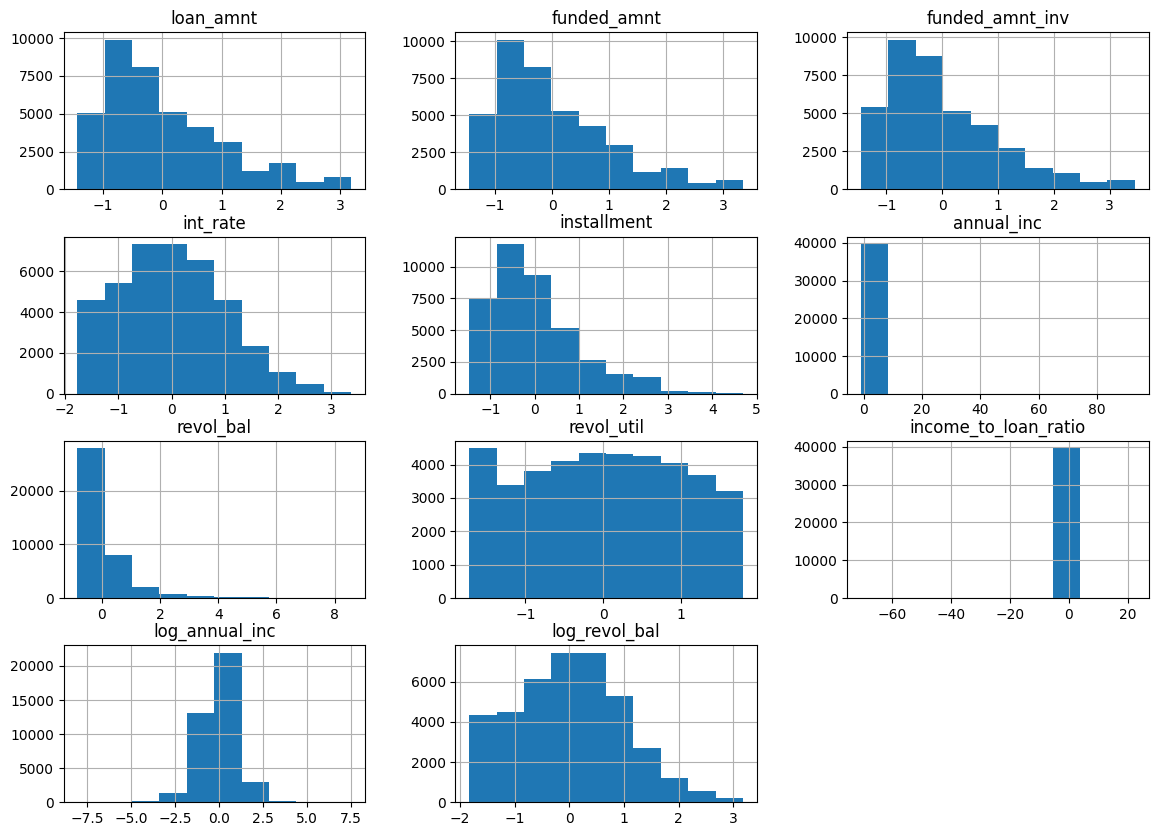

In [88]:
import matplotlib.pyplot as plt
# Histograms for numerical variables
df[numerical_features].hist(figsize=(14, 10))
plt.show()


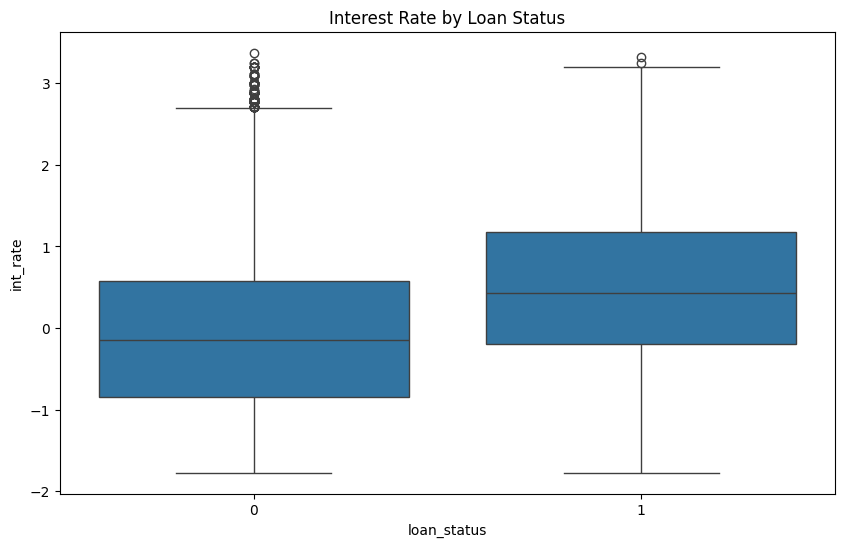

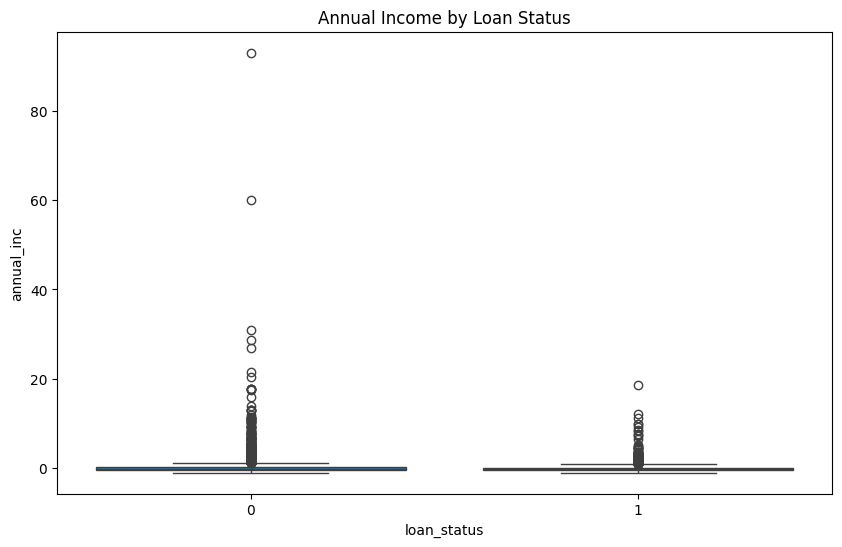

In [89]:
# Bivariate Analysis
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title('Interest Rate by Loan Status')
plt.show()

# Boxplots to analyze the relationship between annual_inc and loan_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.title('Annual Income by Loan Status')
plt.show()


In [90]:
df.groupby(by='loan_status')['loan_amnt'].describe()

# 0 is charged off
# 1 is fully paid

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,34090.0,-0.019590,0.984035,-1.437582,-0.773739,-0.190361,0.507010,3.189206
1,5627.0,0.118679,1.084376,-1.383939,-0.753622,-0.163539,0.708174,3.189206


In [75]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'
df.home_ownership.value_counts()

home_ownership
0    36659
1     3058
Name: count, dtype: int64

<Axes: xlabel='verification_status', ylabel='count'>

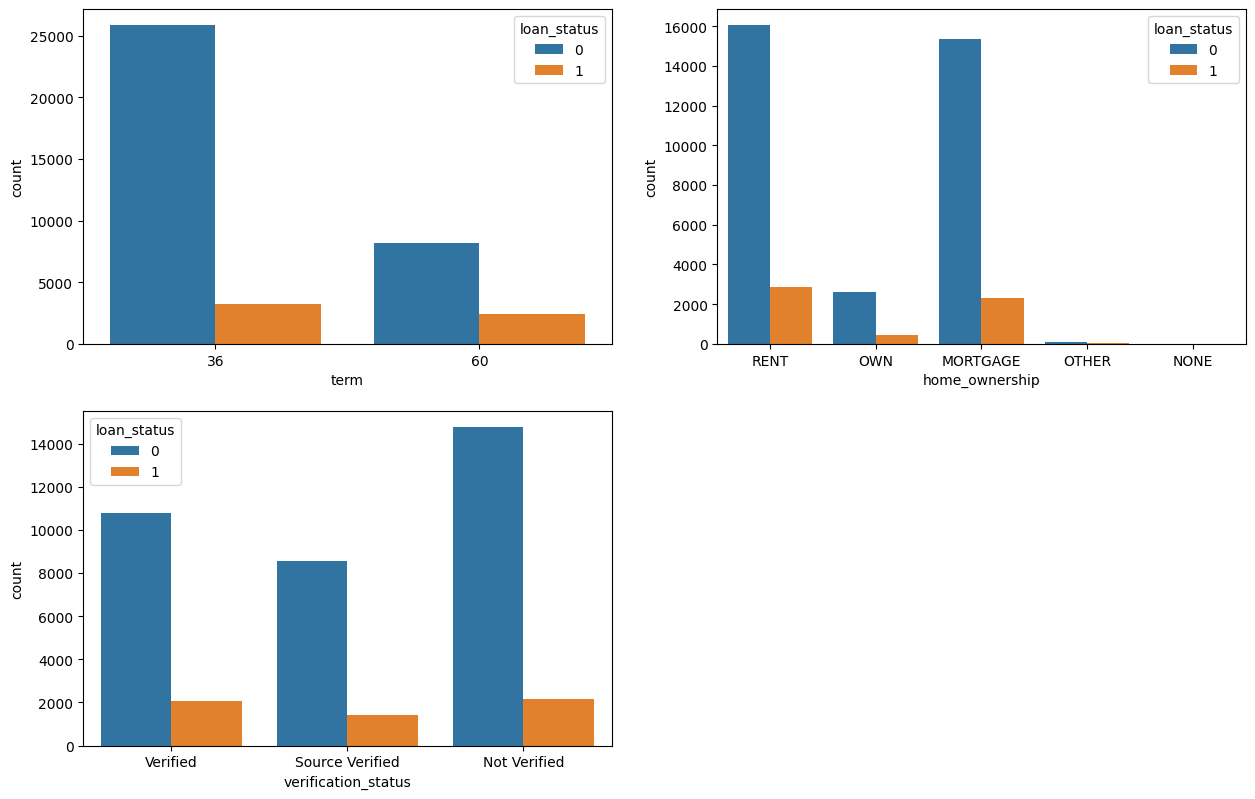

In [94]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

